In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,5)

In [2]:
DOR = pd.read_excel("/Users/melikakeshavarz/Desktop/Mol/All_bound_M.xlsx", sheet_name = "DOR")
CDR = pd.read_excel("/Users/melikakeshavarz/Desktop/Mol/All_bound_M.xlsx", sheet_name = "CDR")
DDR = pd.read_excel("/Users/melikakeshavarz/Desktop/Mol/All_bound_M.xlsx", sheet_name = "DDR")

In [3]:
DDR.head()


,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState
0,P58928,4b1q,P,20,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,3,5,P,P,0,0,W,V,-1.33,-0.968,0.358,1.01,short,minimally
2,P58928,4b1q,P,20,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,6,P,P,0,0,L,P,-0.987,-0.968,0.358,0.054,water-mediated,neutral
4,P58928,4b1q,P,20,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
DOR.head()


,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState
0,1ARG,5,7,A,A,3.304,0.057,M,E,-1.267,-1.571,0.444,-0.685,long,neutral
1,1ARG,5,8,A,A,3.304,0,M,N,-1.291,-1.571,0.444,-0.631,long,neutral
2,1ARG,5,9,A,A,3.304,3.957,M,I,-2.553,-1.571,0.444,2.21,long,minimally
3,1ARG,5,119,A,B,3.304,0.398,M,L,-2.395,-1.571,0.444,1.856,long,minimally
4,1ARG,5,123,A,B,3.304,0.999,M,T,-1.739,-1.571,0.444,0.378,short,neutral


In [9]:
# all free dataset.
DOR_f = pd.read_excel("/Users/melikakeshavarz/Desktop/Mol/wetransfer_all_bound-xlsx_2023-05-31_1933/All_free.xlsx", sheet_name = "DOR")

In [239]:
DOR['Res2'].apply(type).unique()

array([<class 'int'>, <class 'str'>], dtype=object)

In [241]:
DOR['Res1'].apply(type).unique()

array([<class 'int'>, <class 'str'>], dtype=object)

In [98]:
CDR['Res2'].apply(type).unique()

array([<class 'int'>, <class 'str'>, <class 'float'>], dtype=object)

In [99]:
CDR['Res1'].apply(type).unique()

array([<class 'int'>, <class 'str'>], dtype=object)

In [100]:
CDR['PdbID'].apply(type).unique()

array([<class 'str'>, <class 'int'>], dtype=object)

## cleaning DOR:

In [10]:
index = DOR.loc[DOR['PdbID'] == 'PdbID'].index
DOR.drop(index, inplace = True)
#DOR.head(5)

index = DOR_f.loc[DOR_f['PdbID'] == 'PdbID'].index
DOR_f.drop(index, inplace = True)
DOR_f.head(5)

,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState
0,1ASM_B,5,7,B,B,0,0,M,E,-1.115,-1.512,0.455,-0.872,water-mediated,neutral
1,1ASM_B,5,8,B,B,0,0,M,N,-0.787,-1.512,0.455,-1.591,water-mediated,highly
2,1ASM_B,5,9,B,B,0,0,M,I,-1.534,-1.512,0.455,0.05,water-mediated,neutral
3,1ASM_B,6,8,B,B,0,0,F,N,-0.988,-1.512,0.455,-1.151,water-mediated,highly
4,1ASM_B,6,9,B,B,0,0,F,I,-1.668,-1.512,0.455,0.343,short,neutral


## cleaning CDR:

In [5]:
index = CDR.loc[CDR['PdbID'] == 'PdbID'].index
index2 = CDR.loc[CDR['PdbID'] == 44927].index
CDR.drop(index, inplace = True)
CDR.drop(index2, inplace = True)
#CDR.head(5)

## Working with DOR:

In [15]:
Hydropathy = {"Hphob": ['I', 'V','L', 'F', 'C', 'M', 'A', 'W'],
               "Hphilic": ['N', 'D', 'Q', 'E', 'K', 'R'],
               "Neutral": ['G', 'T', 'S', 'Y', 'P', 'H']}

In [6]:
amino_acids = {"I": "Hphob", "V": "Hphob", "L": "Hphob", "F": "Hphob", "C": "Hphob", "M":"Hphob", "A":"Hphob", "W": "Hphob",
              "N": "Hphilic", "D": "Hphilic", "Q": "Hphilic", "E": "Hphilic", "K": "Hphilic", "R": "Hphilic",
              "G": "Neutral", "T": "Neutral", "S": "Neutral", "Y": "Neutral", "P": "Neutral", "H": "Neutral"}

In [7]:
#creating dataframes regardless of the name of proteins, only based on the amino acid names

DOR['Hpathyclass1'] = DOR['AA1'].map(amino_acids)
DOR['Hpathyclass2'] = DOR['AA2'].map(amino_acids)
DOR.head(5)

,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState,Hpathyclass1,Hpathyclass2
0,1ARG,5,7,A,A,3.304,0.057,M,E,-1.267,-1.571,0.444,-0.685,long,neutral,Hphob,Hphilic
1,1ARG,5,8,A,A,3.304,0,M,N,-1.291,-1.571,0.444,-0.631,long,neutral,Hphob,Hphilic
2,1ARG,5,9,A,A,3.304,3.957,M,I,-2.553,-1.571,0.444,2.21,long,minimally,Hphob,Hphob
3,1ARG,5,119,A,B,3.304,0.398,M,L,-2.395,-1.571,0.444,1.856,long,minimally,Hphob,Hphob
4,1ARG,5,123,A,B,3.304,0.999,M,T,-1.739,-1.571,0.444,0.378,short,neutral,Hphob,Neutral


In [8]:
plist = DOR['PdbID'].unique()  # this is the protein list we have in the sheet DOR.
plist

array(['1ARG', '1ASM', '1AVP', '1B6C', '1BHM', '1BKD', '1CWQ', '1D2I',
       '1EPL', '1F34', '1F5Q', '1FJG', '1G4U', '1G64', '1GP2', '1H03',
       '1H3I', '1HN4', '1HYG', '1II6', '1IMA', '1IPS', '1IXY', '1J7V',
       '1K90', '1MK2', '1NVQ', '1O87', '1OW3', '1P7L', '1QJS', '1T8L',
       '1U1K', '1UJW', '1UZJ', '1VG9', '2AXT', '2CKD', '2EWN', '2H42',
       '2IKO', '2J6H', '2P0J', '2PAV', '2Q10', '2R56', '2Y48', '3AEV',
       '3AGZ', '3BUK', '3DG7', '3DS9', '3GLM', '3KTQ', '3NGS', '3OU6',
       '3PQC', '3V6R', '4E7Z', '4EI7', '4FG9', '4FOU', '4H3B', '4HBM',
       '4HOR', '4PBY', '4PSW', '4QRA', '4TYH', '4XJ0', '4Z2M', '5ACV',
       '5E5R', '5ETA', '5JIU', '5LI6', '5TB5', '5VN7'], dtype=object)

# comparison between bound free and all bound DOR:

In [19]:
Hgroup_dor = DOR.groupby(['Hpathyclass1', 'Hpathyclass2'])

DR = pd.DataFrame()

for name, group in Hgroup_dor:

    DR = pd.concat([DR, group])
    
    
DR = DR.reset_index(drop = True)
DR.head(5)

,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState,Hpathyclass1,Hpathyclass2
0,1ARG,7,248,A,B,0.057,0.408,E,K,-2.185,-1.571,0.444,1.384,water-mediated,minimally,Hphilic,Hphilic
1,1ARG,7,249,A,B,0.057,4.772,E,E,-1.329,-1.571,0.444,-0.545,long,neutral,Hphilic,Hphilic
2,1ARG,7,282,A,B,0.057,2.267,E,R,-2.393,-1.571,0.444,1.851,water-mediated,minimally,Hphilic,Hphilic
3,1ARG,8,122,A,B,0,1.511,N,N,-1.9,-1.571,0.444,0.741,water-mediated,neutral,Hphilic,Hphilic
4,1ARG,8,282,A,B,0,2.267,N,R,-1.927,-1.571,0.444,0.802,water-mediated,minimally,Hphilic,Hphilic


In [23]:
DOR_f['Hpathyclass1'] = DOR_f['AA1'].map(amino_acids)
DOR_f['Hpathyclass2'] = DOR_f['AA2'].map(amino_acids)
DOR_f.head(5)

,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState,Hpathyclass1,Hpathyclass2
0,1ASM_B,5,7,B,B,0,0,M,E,-1.115,-1.512,0.455,-0.872,water-mediated,neutral,Hphob,Hphilic
1,1ASM_B,5,8,B,B,0,0,M,N,-0.787,-1.512,0.455,-1.591,water-mediated,highly,Hphob,Hphilic
2,1ASM_B,5,9,B,B,0,0,M,I,-1.534,-1.512,0.455,0.05,water-mediated,neutral,Hphob,Hphob
3,1ASM_B,6,8,B,B,0,0,F,N,-0.988,-1.512,0.455,-1.151,water-mediated,highly,Hphob,Hphilic
4,1ASM_B,6,9,B,B,0,0,F,I,-1.668,-1.512,0.455,0.343,short,neutral,Hphob,Hphob


In [24]:
Hgroup_dor_f = DOR_f.groupby(['Hpathyclass1', 'Hpathyclass2'])

DR_f = pd.DataFrame()

for name, group in Hgroup_dor_f:

    DR_f = pd.concat([DR_f, group])
DR_f = DR_f.reset_index(drop = True)
DR_f.head(5)

,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState,Hpathyclass1,Hpathyclass2
0,1ASM_B,15,22,B,B,0,0,D,D,-1.156,-1.512,0.455,-0.78,water-mediated,neutral,Hphilic,Hphilic
1,1ASM_B,15,142,B,B,0,0.108,D,N,-1.439,-1.512,0.455,-0.159,water-mediated,neutral,Hphilic,Hphilic
2,1ASM_B,22,25,B,B,0,0,D,R,-1.366,-1.512,0.455,-0.32,short,neutral,Hphilic,Hphilic
3,1ASM_B,25,27,B,B,0,0.041,R,D,-2.035,-1.512,0.455,1.15,water-mediated,minimally,Hphilic,Hphilic
4,1ASM_B,25,34,B,B,0,0.888,R,N,-2.062,-1.512,0.455,1.208,water-mediated,minimally,Hphilic,Hphilic


<Axes: xlabel='AA1', ylabel='FrstIndex'>

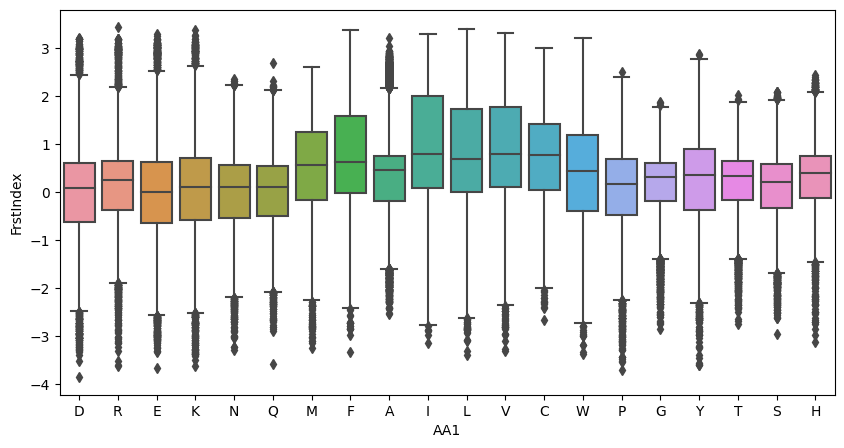

In [25]:
sns.boxplot(x = DR_f['AA1'], y = DR_f['FrstIndex'])

<Axes: xlabel='AA1', ylabel='FrstIndex'>

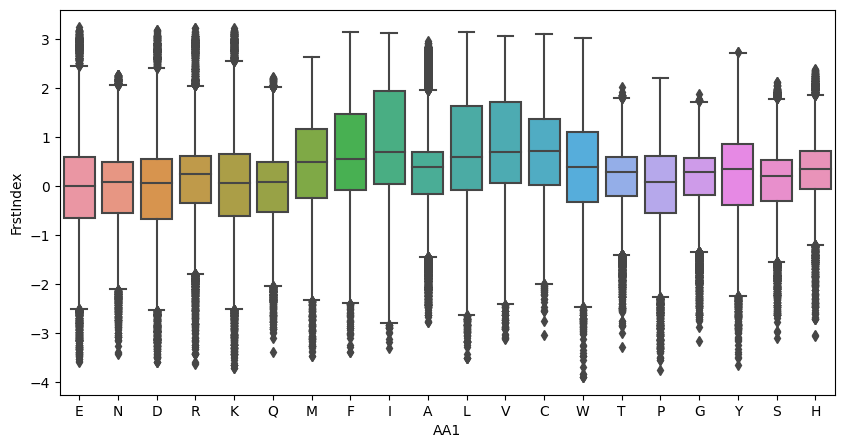

In [252]:
sns.boxplot(x = DR['AA1'], y = DR['FrstIndex'])

<Axes: xlabel='AA1', ylabel='FrstIndex'>

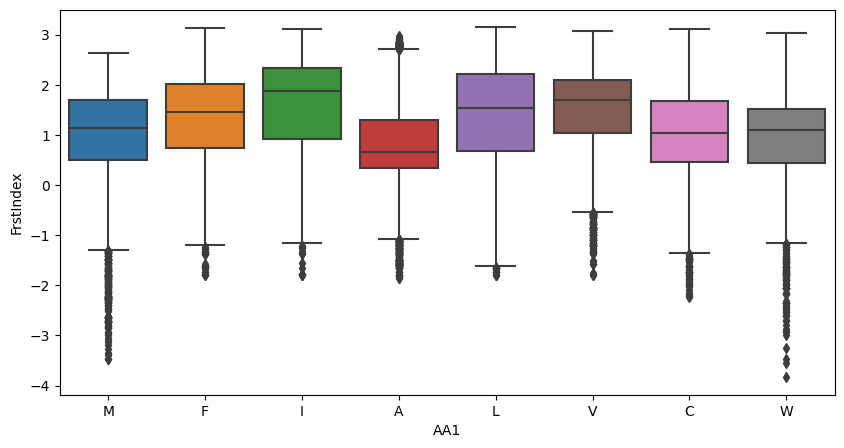

In [27]:
phob = Hgroup_dor.get_group(('Hphob', 'Hphob'))

sns.boxplot(x = phob['AA1'], y = phob['FrstIndex'])

## Protein 1ARG:


### Frustration index : 
In the context of the frustration index for amino acids, negative and positive indexes refer to the different types of amino acid interactions and their associated energetic preferences.

Negative indexes indicate favorable or stabilizing interactions between amino acids. These interactions typically involve complementary shapes, favorable electrostatic interactions, and hydrogen bonding. Negative indexes suggest that the amino acid interactions contribute to the stability and proper folding of the protein structure.

Positive indexes, on the other hand, indicate unfavorable or destabilizing interactions between amino acids. These interactions can arise from steric clashes, repulsive electrostatic interactions, or strained conformations. Positive indexes suggest that the amino acid interactions introduce frustration or energetic dissatisfaction within the protein structure.

By considering both negative and positive indexes, researchers can assess the overall balance between stabilizing and destabilizing interactions in a protein. This information can provide insights into the folding dynamics, stability, and functional properties of the protein.



In [32]:
zero = DOR[DOR['PdbID'] == plist[0]]

In [33]:
len(zero)

5830

In [35]:
Hgroup_zero = zero.groupby(['Hpathyclass1', 'Hpathyclass2'])
zero = pd.DataFrame()

for name, group in Hgroup_zero:

    zero = pd.concat([zero, group])

In [36]:
len(zero)

5830

In [37]:
zero = zero.reset_index(drop = True)

In [ ]:
Hydropathy = {"Hphob": ['I', 'V','L', 'F', 'C', 'M', 'A', 'W'],
               "Hphilic": ['N', 'D', 'Q', 'E', 'K', 'R'],
               "Neutral": ['G', 'T', 'S', 'Y', 'P', 'H']}

In [39]:
from pandas.api.types import CategoricalDtype


In [85]:
cat_size_order = CategoricalDtype(
    ["I", "V", "L", "F", "C", "M", "A", "W", "G", "T", "S", "Y", "P", "H", "N", "D", "Q", "E", "K", "R"], 
    ordered=True
)

zero['AA1'] = zero['AA1'].astype(cat_size_order)
zero['AA2'] = zero['AA2'].astype(cat_size_order)
zero = zero.sort_values(['AA1', 'AA2']).reset_index(drop = True)

In [45]:
zero.head(5)

,PdbID,Res1,Res2,ChainRes1,ChainRes2,DensityRes1,DensityRes2,AA1,AA2,NativeEnergy,DecoyEnergy,SDEnergy,FrstIndex,Welltype,FrstState,Hpathyclass1,Hpathyclass2
0,1ARG,17,37,A,A,2.31,2.183,I,I,-2.533,-1.571,0.444,2.167,short,minimally,Hphob,Hphob
1,1ARG,73,291,A,A,4.249,2.918,I,I,-2.728,-1.571,0.444,2.606,short,minimally,Hphob,Hphob
2,1ARG,309,318,A,A,2,1.256,I,I,-2.555,-1.571,0.444,2.215,water-mediated,minimally,Hphob,Hphob
3,1ARG,17,37,B,B,2.194,2.687,I,I,-2.544,-1.571,0.444,2.19,short,minimally,Hphob,Hphob
4,1ARG,73,291,B,B,4.326,2.896,I,I,-2.723,-1.571,0.444,2.594,short,minimally,Hphob,Hphob


In [48]:
#zero is the dataset for protein 1ARG, zero means 0th index in plist.

warnings.filterwarnings("ignore", category=FutureWarning)
MFmat = zero.groupby(["AA1","AA2"], sort = False).median()['FrstIndex'].unstack().replace(np.nan, 0)
MFmat.head(3)

#zero.groupby(["AA1","AA2"]).mean()['FrstIndex'].replace(np.nan, 0)

AA2,I,V,L,F,C,M,A,W,G,T,S,Y,P,H,N,D,Q,E,K,R
AA1,,,,,,,,,,,,,,,,,,,,
I,2.212,2.0535,1.945,1.6150,0.9375,2.0040,0.6995,1.0975,0.533,0.692,0.407,0.8460,-0.2045,0.0000,-0.500,-0.254,-0.5935,-0.1990,-0.2740,-0.1505
V,2.154,1.9655,2.093,1.7005,1.8160,1.3055,1.1850,1.2330,0.654,0.409,0.028,1.6415,0.0410,0.4120,0.279,-0.179,-0.9310,0.2790,0.4495,0.5090
L,1.942,1.6455,1.839,1.6240,1.0510,1.9830,0.5730,1.0215,-0.062,0.392,0.140,1.0830,-0.0810,0.2995,-0.295,-0.232,0.0750,-0.7235,-0.3000,-0.2505


In [ ]:
Hydropathy = {"Hphob": ['I', 'V','L', 'F', 'C', 'M', 'A', 'W'],
               "Hphilic": ['N', 'D', 'Q', 'E', 'K', 'R'],
               "Neutral": ['G', 'T', 'S', 'Y', 'P', 'H']}

#### we plotted the mean of frustration index for each connection in this protein.

*note: Here zero for frustration mean they didn't have any connection*

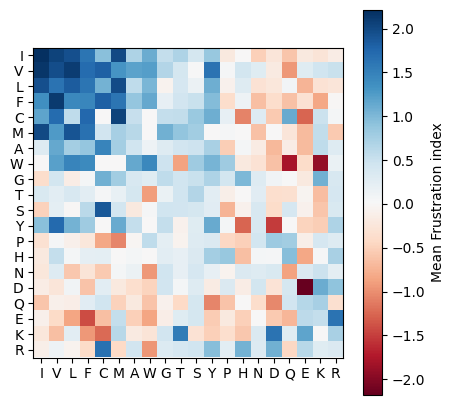

In [49]:
fig_cor, axes_cor = plt.subplots(1,1)
fig_cor.set_size_inches(5, 5)

labels = MFmat.index.to_list()
image = axes_cor.imshow(MFmat, cmap = plt.cm.RdBu)
plt.colorbar(image).set_label('Mean Frustration index')
axes_cor.set_xticks(np.arange(0,len(labels), 1))
axes_cor.set_yticks(np.arange(0,len(labels), 1))

axes_cor.set_xticklabels(labels)
axes_cor.set_yticklabels(labels)
plt.draw()



#### we plotted the variance of frustration index for each connection, since we are not sure whether these contacts are favourable in general in this protein or they are favourable in just one location of the chain.

In [50]:
VFmat = zero.groupby(["AA1","AA2"]).var()['FrstIndex'].unstack().replace(np.nan, 0)
VFmat.head(3)

AA2,I,V,L,F,C,M,A,W,G,T,S,Y,P,H,N,D,Q,E,K,R
AA1,,,,,,,,,,,,,,,,,,,,
I,0.043981,0.144929,1.873493,0.876091,0.128078,0.012540,0.994014,0.044618,0.142173,0.715364,0.413808,0.079981,0.298421,0.000000,0.518169,0.228054,0.372291,0.137816,0.223202,0.348644
V,0.227785,0.169328,0.372192,0.435155,0.775357,0.018867,0.479230,0.099458,0.123814,0.152839,0.293551,0.077687,0.107033,0.095372,0.282361,0.212994,0.069938,0.215571,0.936617,0.221256
L,0.803132,0.453571,1.024728,0.576072,0.600874,0.480403,1.055584,0.594181,0.213470,0.194170,0.613439,0.528014,0.272593,0.287528,0.659877,0.913792,0.241903,0.588353,0.827858,0.861698


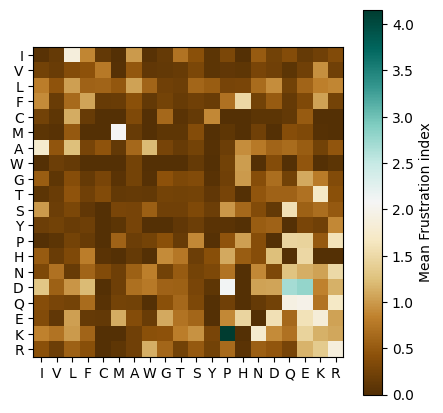

In [51]:
#zero here means no connection again

fig_cor, axes_cor = plt.subplots(1,1)
fig_cor.set_size_inches(5, 5)

labels = VFmat.index.to_list()
image = axes_cor.imshow(VFmat, cmap = plt.cm.BrBG)
plt.colorbar(image).set_label('Mean Frustration index')
axes_cor.set_xticks(np.arange(0,len(labels), 1))
axes_cor.set_yticks(np.arange(0,len(labels), 1))

axes_cor.set_xticklabels(labels)
axes_cor.set_yticklabels(labels)
plt.draw()

In [15]:
#d =zero[(zero['AA1']== 'M') & (zero['AA2']== 'E')]
#d['FrstIndex'].var()

In [16]:
#zero.groupby(['Res2']).count()['ChainRes1'].unstack()

In [17]:
#zero.groupby(["Res1","ChainRes1","ChainRes2" ]).count()["Res2"].unstack()

In [18]:
#zero[zero['Res1'] == res1[0]]

#### Let's do the same thing for all proteins in the DOR file:

In [52]:
plist[0]

'1ARG'

In [ ]:
mapper = map(lambda protein : DOR[DOR['PdbID'] == protein].reset_index(drop= True), plist)
maplist = list(mapper)
maplist[2].head(3)


In [91]:
cat_size_order = CategoricalDtype(
    ["I", "V", "L", "F", "C", "M", "A", "W", "G", "T", "S", "Y", "P", "H", "N", "D", "Q", "E", "K", "R"], 
    ordered=True
)

proteins_D = []
for p in maplist:
    p['AA1'] = p['AA1'].astype(cat_size_order)
    p['AA2'] = p['AA2'].astype(cat_size_order)
    p = p.sort_values(['AA1', 'AA2']).reset_index(drop = True)
    proteins_D.append(p)
    
    


In [94]:
Proteins_D = map(lambda ProDF: ProDF.groupby(["AA1","AA2"], sort = False).median()['FrstIndex'].unstack().replace(np.nan, 0), proteins_D)
Proteins_D  = list(Proteins_D )
Proteins_D[0].head(4)


AA2,I,V,L,F,C,M,A,W,G,T,S,Y,P,H,N,D,Q,E,K,R
AA1,,,,,,,,,,,,,,,,,,,,
I,2.212,2.0535,1.9450,1.6150,0.9375,2.0040,0.6995,1.0975,0.533,0.6920,0.407,0.8460,-0.2045,0.0000,-0.500,-0.254,-0.5935,-0.1990,-0.2740,-0.1505
V,2.154,1.9655,2.0930,1.7005,1.8160,1.3055,1.1850,1.2330,0.654,0.4090,0.028,1.6415,0.0410,0.4120,0.279,-0.179,-0.9310,0.2790,0.4495,0.5090
L,1.942,1.6455,1.8390,1.6240,1.0510,1.9830,0.5730,1.0215,-0.062,0.3920,0.140,1.0830,-0.0810,0.2995,-0.295,-0.232,0.0750,-0.7235,-0.3000,-0.2505
F,1.363,2.1210,1.4365,1.4570,1.8025,1.6145,0.8700,1.1315,0.204,0.4315,0.505,0.9705,-0.3775,0.1350,-0.642,-0.369,-0.6240,-0.3100,-0.8335,-0.0170


In [105]:
cat_size_order = CategoricalDtype(
    ["I", "V", "L", "F", "C", "M", "A", "W", "G", "T", "S", "Y", "P", "H", "N", "D", "Q", "E", "K", "R"], 
    ordered=True
)




def MF_creator(DF, folder):
        plist = DF['PdbID'].unique()
        pmapper = map(lambda protein : DF[DF['PdbID'] == protein].reset_index(drop= True), plist)
        pmaplist = list(pmapper)
        #group the proteins by their hyropathy:
        proteins_D = []
        for p in maplist:
            p['AA1'] = p['AA1'].astype(cat_size_order)
            p['AA2'] = p['AA2'].astype(cat_size_order)
            p = p.sort_values(['AA1', 'AA2']).reset_index(drop = True)
            proteins_D.append(p)
        #creating the matrix for the images
        Proteins_D = map(lambda ProDF: ProDF.groupby(["AA1","AA2"], sort = False).median()['FrstIndex'].unstack().replace(np.nan, 0), proteins_D)
        MFlist  = list(Proteins_D )
        
    
        
        
        
        
        
        i = 0
        for mat in MFlist:
            
                fig_cor, axes_cor = plt.subplots(1,1)
                fig_cor.set_size_inches(5, 5)

                labels = mat.index.to_list()
                image = axes_cor.imshow(mat, cmap = plt.cm.RdBu)
                plt.colorbar(image).set_label('Median of Frustration index')
                axes_cor.set_xticks(np.arange(0,len(labels), 1))
                axes_cor.set_yticks(np.arange(0,len(labels), 1))

                axes_cor.set_xticklabels(labels)
                axes_cor.set_yticklabels(labels)
                plt.savefig(folder+'/'+ plist[i]+'.png')
                plt.close()
                i = i + 1
        

        
        
        
        
        
        
       

In [106]:
MF_creator(DOR, 'imDOR')

### Working with CDR:

In [33]:
plist = CDR['PdbID'].unique()
plist

array(['1A2W', '1BIL', '1BZY', '1F5Q', '1G4K', '1G64', '1GL1', '1HPU',
       '1HZX', '1I7W', '1IJJ', 44927, '1K2P', '1M1E', '1M4H', '1NVQ',
       '1PKH', '1PYG', '1Q4K', '1Q5Y', '1SVW', '1U76', '1UDU', '1UL1',
       '1VGO', '2ATH', '2EPN', '2FL2', '2IFW', '2JJB', '2OPZ', '2P0J',
       '2PS1', '2PZY', '2V5H', '2W97', '2XU7', '2Z8V', '2Z8W', '3A73',
       '3AGD', '3BQB', '3CJQ', '3CNZ', '3CW2', '3ES7', '3EXS', '3FHI',
       '3GCM', '3M1F', '3MHY', '3N9W', '3NGS', '3O08', '3R2B', '3SND',
       '3TCJ', '3V6R', '3VYS', '3ZN5', '4BUR', '4C3P', '4EB4', '4FG8',
       '4GM9', '4JSE', '4L1B', '4MCB', '4NDN', '4NJZ', '4PBY', '4U8H',
       '5DDT', '5GJM', '5L0D', '5LIE', '5MSR', '5MST', '5MT6', '5XFP'],
      dtype=object)

---
ALL BOUND